In [ ]:
pip install yahooquery pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=af0439b963fef83ba8c78a14d560c83808af756236911b7683e15da584b98bb8
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas.io.excel import read_excel
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
from yahooquery import search
import datetime

from google.colab import files
list_sp = files.upload()
file_name1 = next(iter(list_sp))
df_green = pd.read_excel(file_name1)
df_green = df_green['name']
plt.style.use('fivethirtyeight')

Saving green_data.xlsx to green_data.xlsx


In [ ]:
def stock_universe(tickers, start_date, end_date):
  start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

  data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, period="1d")

  # Use the 'Adj Close' column to get the closing prices
  data = data['Close']

  return data


ticker = 'AAPL'
# convert the Df to a list for creating the universe
ticker_symbols = df_g.tolist()
start_date = "2018-01-01"
end_date = "2023-09-10"
stock_data = stock_universe(ticker_symbols, start_date, end_date)

print(data.head())
print('High' in data)
print('Low' in data)

In [ ]:
yf.pdr_override()
def stock_universe(tickers, start_date, end_date):
  """
  This function searchs and get the information from the yahoo finance for the
  adj price

  Args:
    tickers = List data type of list of all of the stocks tickers
    start_date = String formart and YYYY-MM-DD
    end_date = String formart and YYYY-MM-DD

  returns:
    data = returns DataFrame of all the stocks and the adj price
  """

  start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

  data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, period="1d")

  # Use the 'Adj Close' column to get the closing prices
  data = data['Close']

  return data

def get_ticker(df):
    """
    This function takes a dataframe with the list of company names and returns a dataframe with the corresponding tickers.

    Args:
        df (DataFrame): A dataframe containing company names.

    Returns:
        df_tickers (DataFrame): A dataframe with tickers.
    """
    # Create a new dataframe with uppercase company names
    df_upper_case = pd.DataFrame(df)
    df_upper_case['comps'] = df.str.upper()

    # Create columns for info and tickers
    df_upper_case['info'] = ''
    df_upper_case['tickers'] = ''

    # Search for tickers by name
    for i, row in df_upper_case.iterrows():
        search_results = search(row['comps'])
        if 'quotes' in search_results:
            quotes = search_results['quotes']
            if quotes:
                df_upper_case.at[i, 'info'] = quotes[0]
                df_upper_case.at[i, 'tickers'] = quotes[0]['symbol']

    return df_upper_case

# Lets get the ticker information since the data is provided only with
# the name of the stock and the functiona nd yfinance only takes tickers
df_green['ticker'] = get_ticker(df_green)
print(df_green['ticker']['tickers'])

# Here we gather quite a lot of information and we filter it for better use
df_g = df_green['ticker']['tickers']

# convert the Df to a list for creating the universe
ticker_symbols = df_g.tolist()
start_date = "2018-01-01"
end_date = "2023-09-10"
stock_data = stock_universe(ticker_symbols, start_date, end_date)


0         NFLX
1      EBT-USD
2            V
3         BERY
4           GM
        ...   
115         BR
116       SPLK
117       PANW
118       DOCU
119       OKTA
Name: tickers, Length: 120, dtype: object


ERROR:yfinance:Could not get exchangeTimezoneName for ticker '' reason: list index out of range


[*********************100%%**********************]  119 of 119 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['']: %ticker%E%ticker%x%ticker%c%ticker%e%ticker%p%ticker%t%ticker%i%ticker%o%ticker%n%ticker%(%ticker%'%ticker%:%ticker% %ticker%N%ticker%o%ticker% %ticker%t%ticker%i%ticker%m%ticker%e%ticker%z%ticker%o%ticker%n%ticker%e%ticker% %ticker%f%ticker%o%ticker%u%ticker%n%ticker%d%ticker%,%ticker% %ticker%s%ticker%y%ticker%m%ticker%b%ticker%o%ticker%l%ticker% %ticker%m%ticker%a%ticker%y%ticker% %ticker%b%ticker%e%ticker% %ticker%d%ticker%e%ticker%l%ticker%i%ticker%s%ticker%t%ticker%e%ticker%d%ticker%'%ticker%)%ticker%
ERROR:yfinance:['US92556H1077.SG']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-01 00:00:00 -> 2023-09-10 00:00:00)')


In [ ]:
print(ticker_symbols)

GOOGL


In [ ]:
print(stock_data.columns)

Index(['', '0QYJ.IL', 'A', 'AAL', 'AAPL', 'ABBV', 'ACM', 'ADBE', 'ADI', 'ADSK',
       ...
       'VST', 'VZ', 'WDAY', 'WFC', 'WMT', 'WY', 'XRX', 'XYL', 'YUM', 'Z0Y.SG'],
      dtype='object', length=119)


In [ ]:
# create a new and more clean DF, drop all the columns that are not stocks
clean_g = stock_data[stock_data.columns[~stock_data.columns.str.contains('\.')]]
print(clean_g.columns)

Index(['', 'A', 'AAL', 'AAPL', 'ABBV', 'ACM', 'ADBE', 'ADI', 'ADSK', 'AKAM',
       ...
       'VMW', 'VST', 'VZ', 'WDAY', 'WFC', 'WMT', 'WY', 'XRX', 'XYL', 'YUM'],
      dtype='object', length=116)


In [ ]:
# Drop all the empty columns
clean_g = clean_g.dropna(axis=1, how='all')
print(clean_g.columns)

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ACM', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'ALK',
       ...
       'VMW', 'VST', 'VZ', 'WDAY', 'WFC', 'WMT', 'WY', 'XRX', 'XYL', 'YUM'],
      dtype='object', length=115)


In [ ]:
# Calculte the annual mean returns and variances
daily_returns = clean_g.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252


In [ ]:
# Create a new dataframe
df = pd.DataFrame(clean_g.columns, columns=['ticker'])
#print(df)
df['Variances'] = annual_return_variance.values
df['Returns'] = annual_mean_returns.values
print(df)


    ticker  Variances   Returns
0        A   0.074464  0.118816
1      AAL   0.311340 -0.055826
2     AAPL   0.092444  0.267767
3     ABBV   0.068615  0.099405
4      ACM   0.096290  0.175284
..     ...        ...       ...
110    WMT   0.045097  0.101705
111     WY   0.124928  0.048091
112    XRX   0.168132 -0.002496
113    XYL   0.084578  0.094710
114    YUM   0.056886  0.096413

[115 rows x 3 columns]


In [ ]:
# import pandas_ta as ta
'''
from scipy.stats import linregress
import pandas_ta as ta

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope


backrolling_n= 12

#df['ATR'] = clean_g.ta.atr(length = 15)
df['MA200'] = clean_g.ta.ema(length=200)
df['slopeMA200'] = df['MA200'].rolling(window=backrolling_n).apply(get_slope, raw=True)
df['RSI'] = clean_g.ta.rsi(length = 13)
df['slopeATR'] = df['ATR'].rolling(window=backrolling_n).apply(get_slope, raw=True)
'''


In [ ]:
nan_count = df.isna().sum().sum()
print(nan_count)
df = df.dropna()
nan_count = df.isna().sum().sum()
print(nan_count)

1
0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

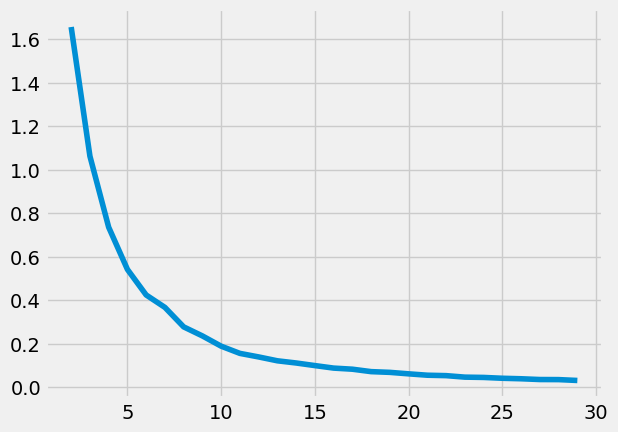

In [ ]:
# Use elbow method to determine the number of clusters to model the stock data
X = df[['Returns','Variances']].values
inertia_list = []
for k in range (2, 30):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

plt.plot(range(2,30), inertia_list)
plt.show()

In [ ]:
# Get the labels and the groups
kmeans = KMeans(n_clusters=15).fit(X)
labels = kmeans.labels_
df['clusters'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


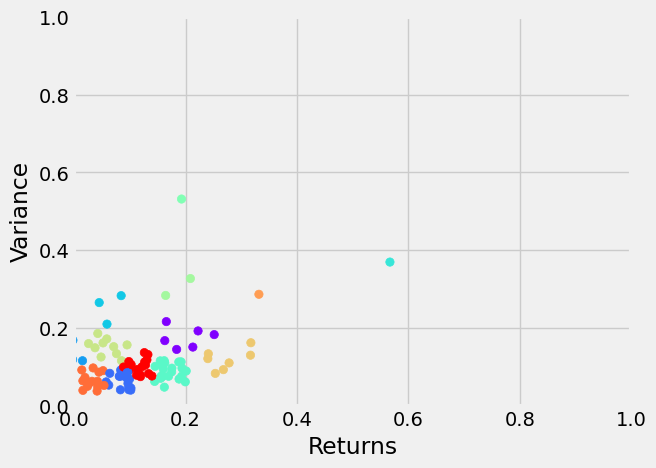

In [ ]:
# Plot the Scaretter clusters
plt.scatter(X[:,0], X[:,1], c=labels,cmap = 'rainbow')
plt.xlabel('Returns')
plt.ylabel('Variance')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [ ]:
# create the function to create a simple diversified portafolio
def div_port(df):
    # Group the DataFrame by the 'clusters' column and select the first row for each group
    result_df = df.groupby('clusters').head(1)[['ticker', 'clusters']]
    return result_df['ticker']
portfolio = div_port(df)
print(portfolio)

0         A
1       AAL
2      AAPL
3      ABBV
4       ACM
7      ADSK
9       ALK
12     ARMK
17     BERY
19     BIIB
38     DOCU
78     OKTA
91     SNAP
99     TSLA
104     VFS
Name: ticker, dtype: object


# **Now tha we have a portfolio, lets decide how much of each stock we will invest**

In [ ]:
def stock_universe_adj(tickers, start_date, end_date):
  """
  This function searchs and get the information from the yahoo finance for the
  adj price

  Args:
    tickers = List data type of list of all of the stocks tickers
    start_date = String formart and YYYY-MM-DD
    end_date = String formart and YYYY-MM-DD

  returns:
    data = returns DataFrame of all the stocks and the adj price
  """

  start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

  data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, period="1d")

  # Use the 'Adj Close' column to get the closing prices
  data = data['Adj Close']

  return data
assets = portfolio.tolist()
#print(assets)

result_array = np.full(14, 0.071428)


#print(result_array)
opt_portfolio = pd.DataFrame()

opt_portfolio = stock_universe_adj(assets,start_date, end_date)

0.06666666666666667
[*********************100%%**********************]  15 of 15 completed


In [ ]:
print(result_array)
opt_portfolio = opt_portfolio.drop('VFS', axis=1)

[0.071428 0.071428 0.071428 0.071428 0.071428 0.071428 0.071428 0.071428
 0.071428 0.071428 0.071428 0.071428 0.071428 0.071428]


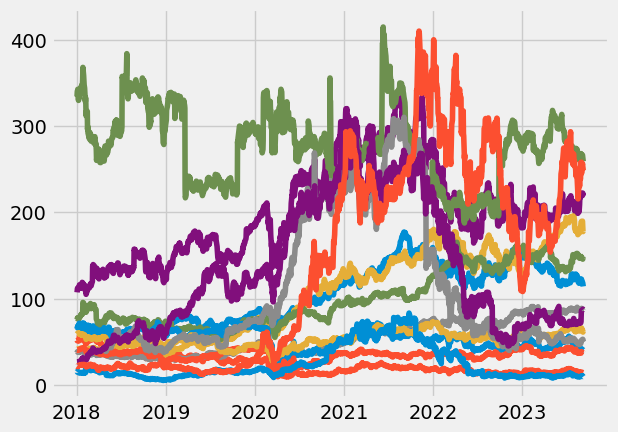

In [ ]:
#print(opt_portfolio)
tmp = opt_portfolio
#tmp = np.cumsum(tmp)
plt.plot(tmp)
plt.show()

In [ ]:
#lets get the simple daily return
returns = tmp.pct_change()

# Lets get the coveriance
cov_matrix_anual = returns.cov() *252
print(cov_matrix_anual) #< the sqrt of this coveriance between prices is the volatility


             A       AAL      AAPL      ABBV       ACM      ADSK       ALK  \
A     0.084229  0.053633  0.051598  0.031313  0.047282  0.068951  0.048416   
AAL   0.053633  0.351870  0.061146  0.027037  0.088830  0.082485  0.208272   
AAPL  0.051598  0.061146  0.104370  0.029684  0.045974  0.078416  0.051136   
ABBV  0.031313  0.027037  0.029684  0.077233  0.032704  0.034977  0.030525   
ACM   0.047282  0.088830  0.045974  0.032704  0.108774  0.065210  0.085232   
ADSK  0.068951  0.082485  0.078416  0.034977  0.065210  0.163217  0.069858   
ALK   0.048416  0.208272  0.051136  0.030525  0.085232  0.069858  0.206363   
ARMK  0.040115  0.111274  0.049299  0.030086  0.084404  0.067497  0.110705   
BERY  0.041074  0.069892  0.039198  0.022307  0.053955  0.050608  0.066057   
BIIB  0.042918  0.032535  0.043349  0.039165  0.032893  0.043412  0.026563   
DOCU  0.068535  0.062886  0.086567  0.022810  0.045496  0.129221  0.051181   
OKTA  0.063214  0.056288  0.077132  0.025953  0.044774  0.121321

In [ ]:
# Let calculare the portfolio variance

port_variance = np.dot(result_array.T,np.dot(cov_matrix_anual,result_array))
print(port_variance)
port_vol = np.sqrt(port_variance)
print(port_vol)

0.07903840398510996
0.2811376957739925


In [ ]:
# Lets calculate Yearly return
port_simple_annual_return = np.sum(returns.mean() * result_array) * 252
print(f"portfolio Anual Return is {port_simple_annual_return}")

per_var = str(round(port_variance, 2)*100)
per_volatility = str(round(port_vol,2)*100)
per_returns = str(round(port_simple_annual_return,2)*100)

print(f"Expected annual return {per_returns}")
print(f"Expected risk {per_volatility}")
print(f"Annual variance {per_var}")

portfolio Anual Return is 0.18847045246572755
Expected annual return 19.0
Expected risk 28.000000000000004
Annual variance 8.0


In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio optimization

mu = expected_returns.mean_historical_return(tmp)
S = risk_models.sample_cov(tmp)

# lets get the best sharpe ratio possible

ef = EfficientFrontier(mu, S)

w = ef.max_sharpe()

new_w = ef.clean_weights()
print(new_w)
ef.portfolio_performance(verbose=True)


OrderedDict([('A', 0.0), ('AAL', 0.0), ('AAPL', 0.59735), ('ABBV', 0.13378), ('ACM', 0.0), ('ADSK', 0.0), ('ALK', 0.0), ('ARMK', 0.0), ('BERY', 0.0), ('BIIB', 0.0), ('DOCU', 0.0), ('OKTA', 0.0), ('SNAP', 0.0), ('TSLA', 0.26887)])
Expected annual return: 34.0%
Annual volatility: 32.7%
Sharpe Ratio: 0.98


(0.3396522697533433, 0.3269452334311438, 0.9776936228699097)